Задание:  
1.+  Загрузить файл hr.csv (можно найти во сложении к заданию)
2.+  Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.+  Рассчитать и визуализировать корреляционную матрицу для переменных
4.+  Визуализировать несколько взаимосвязей между переменными
5.+  С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.+  Рассчитать сколько работников работает в каждом департаменте
7.+  Показать распределение сотрудников по зарплатам
8.+  Показать распределение сотрудников по зарплатам совместно с департаментами
9.+  Сколько сотрудников покинули компанию
10.+ Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind


data = pd.read_csv('HR.csv')

# Основные статиститки

data.mean()
data.median()
data.mode().head(1)
data.min()
data.max()
data.std()

# Расчитать и визуализировать корреляционную матрицу для переменных
plt.matshow(data.corr())

# Кол-во работников в Департаментах
dep_count = data[['satisfaction_level', 'sales']].groupby('sales').count().reset_index()
dep_count.columns = ['sales','p_count']
dep_count. head()


# Распределение сотрудников по Зарплатам
sal_count = data[['satisfaction_level', 'salary']].groupby('salary').count().reset_index()
sal_count.columns = ['salary','p_count']
sal_count.head()

# Распредеелние кол-ва по Зарплатам и Департаментам
ds_count = data[['satisfaction_level', 'sales', 'salary']].groupby(['sales','salary']).count().reset_index()
ds_count.columns = ['sales','salary','p_count']
ds_count.head()

# Кол-во сотрудников покинувших компанию

count_left = data['left'].sum()
count_left


data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


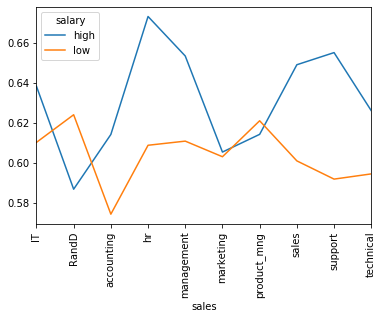

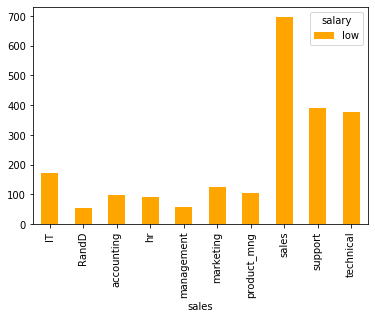

In [119]:
# Несколько визуализаций взаимосвязей.

d_d = data[['sales','salary','satisfaction_level']].groupby(['sales','salary']).mean().reset_index()

p_d = d_d.pivot_table(  index = 'sales',
                        columns = 'salary', 
                        values='satisfaction_level').fillna(0).applymap(float)
p_d.plot(y=['high','low'],rot=90)

# Из графика видно, что работники отделов RanD и PM с низкой ЗП имеют более высокий уровень удовлетворенности,
# чем работники этих же отделов но с высокой ЗП. ВОзможно это влияет на увольнения.

f_d = data[['sales','salary','left']].loc[(data.left == 1)].groupby(['sales','salary']).count().reset_index()
f_dp = f_d.pivot_table(  index = 'sales',
                         columns = 'salary', 
                         values ='left').fillna(0).applymap(float)
f_dp.plot(kind='bar', y=['low'], color='orange')

# Рассматрев оба графика видим некоторую взаимосвязь между кол-вом уволившихся и их уровнем удовлетворенности.
# например отдел RandD с высоким уровнем удовлетворенности но с нихкой ЗП уволнялись реже чем в дургих отделах.

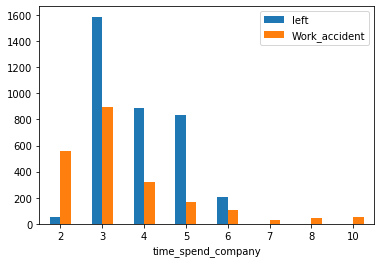

In [37]:
# Гипотеза №1 . Увольняются чаще работники, которые работают в компании отностилельно недавно. 

dod = data[['time_spend_company','left','Work_accident']].groupby(['time_spend_company']).sum().reset_index()
dod.plot(kind='bar', x='time_spend_company', y=['left','Work_accident'], rot=0)

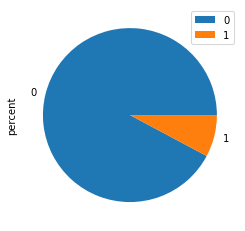

In [48]:
# Гипотеза №2 . Причиной уволнения служат несчастные случаи на рабочем месте.

dd = data[['left','Work_accident']].loc[data.Work_accident == 1].groupby('left').sum().reset_index().head()
dd['percent'] =  (dd['Work_accident'] / np.sum(dd['Work_accident'])) * 100
dd['left'] = dd['left'].replace(0, 'Work')
dd['left'] = dd['left'].replace(1, 'Left')
dd.plot(kind='pie', x='left', y='percent')

# Гипотезу можно считать не верной. Потому, что из 2169 записей с  "Несчастными случаеми" уволилось уволилось только 7,7%

In [8]:
# t-test


sales = data[data['sales']=='sales']
support = data[data['sales']=='support']

print(ttest_ind(sales['satisfaction_level'], support['satisfaction_level']))
print(ttest_ind(sales['satisfaction_level'], sales['last_evaluation']))


Ttest_indResult(statistic=-0.5891866159336399, pvalue=0.555756997961023)
Ttest_indResult(statistic=-20.207320836329757, pvalue=1.1334132755179008e-88)
